In [1]:
import seaborn as sns
import pandas as pd
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/buy_week.csv', index_col=0)

In [8]:
timeSeries = data.iloc[:, :-7]

In [10]:
timeSeries = timeSeries.transpose()

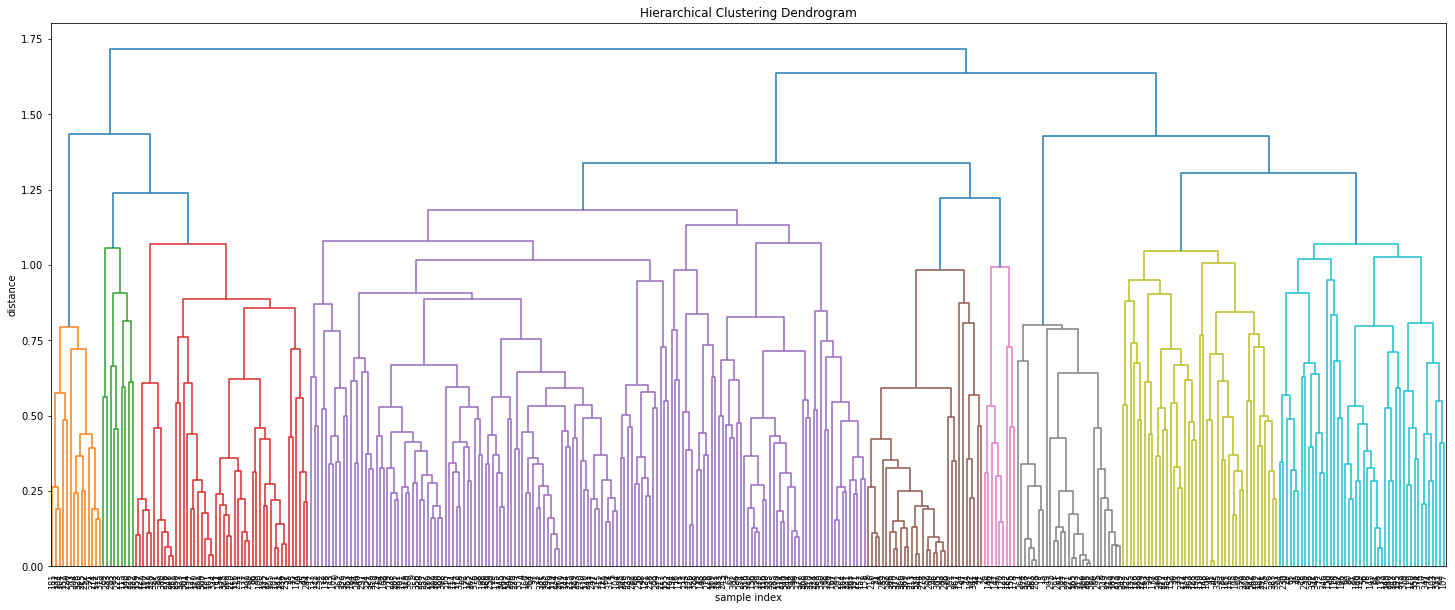

In [17]:
# Do the clustering
Z = hac.linkage(timeSeries, method='complete', metric='correlation')

# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

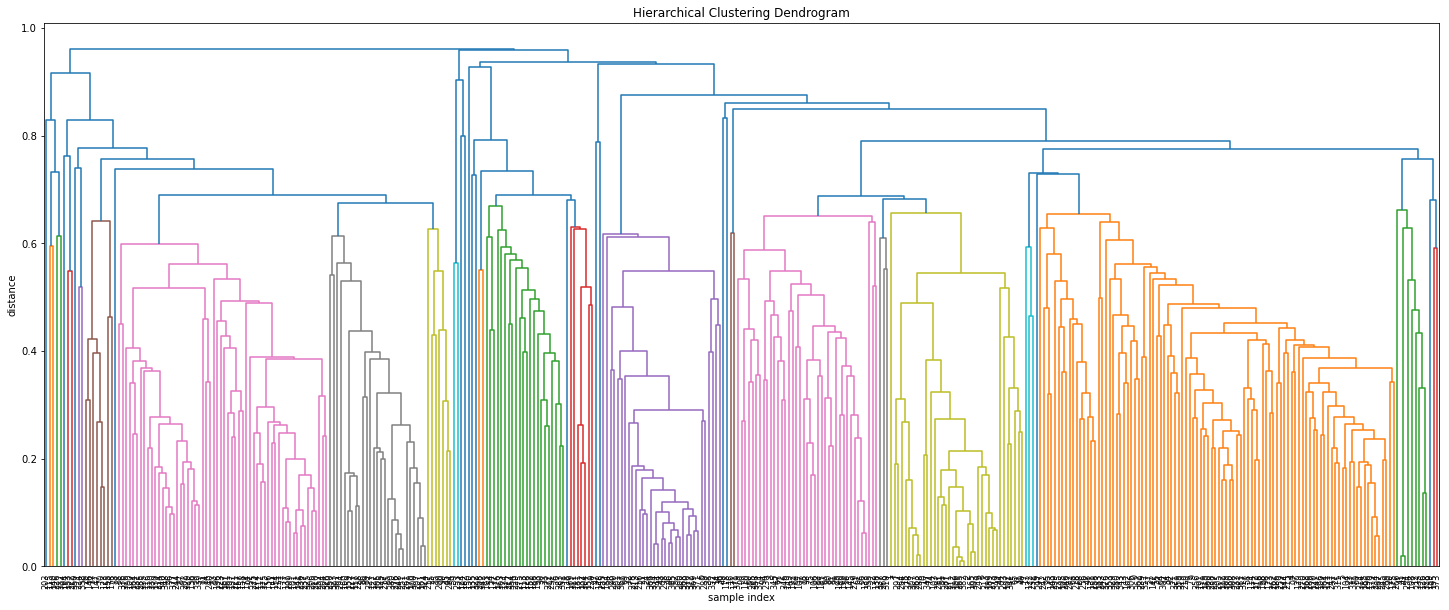

In [15]:
# Do the clustering
Z = hac.linkage(timeSeries, method='average', metric='correlation')

# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [18]:
from scipy.cluster.hierarchy import fcluster

def print_clusters(timeSeries, Z, k, plot=False):
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')

    # check the results
    s = pd.Series(results)
    clusters = s.unique()

    for c in clusters:
        cluster_indeces = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
        if plot:
            timeSeries.T.iloc[:,cluster_indeces].plot()
            plt.show()

print_clusters(timeSeries, Z, 9, plot=False)

Cluster 4 number of entries 153
Cluster 7 number of entries 29
Cluster 5 number of entries 32
Cluster 9 number of entries 46
Cluster 3 number of entries 48
Cluster 6 number of entries 9
Cluster 8 number of entries 43
Cluster 2 number of entries 9
Cluster 1 number of entries 14


In [22]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(timeSeries)

array([1, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 4, 3, 3, 3, 3, 4, 1, 4, 2, 1,
       0, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 1, 3, 4, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3,
       3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1,
       3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3,
       4, 3, 1, 4, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 1, 1, 1, 3, 3, 3, 1,
       1, 1, 3, 1, 0, 3, 3, 0, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1,
       3, 4, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3,
       1, 3, 3, 1, 3, 1, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1,